### Three level AHP Car Examples

#### Import libraries

In [1]:
# from AhpAnpLib import *
from AhpAnpLib import inputs_AHPLib as input
from AhpAnpLib import structs_AHPLib as str
from AhpAnpLib import calcs_AHPLib as calc

#### Create model, nodes, and clusters

In [2]:
#create model
carModel=str.Model("Car 3 Levels")

In [3]:
#create nodes
goal_node=str.Node("GoalNode",0)

prestige=str.Node("1Prestige",1)
price=str.Node("2Price",2)
mpg=str.Node("3MPG",3)
comf=str.Node("4Comfort",4)

sub1=str.Node("2.1InitialCost",5)
sub2=str.Node("2.2Maintenance",6)

alt1=str.Node("1Acura TL",7)
alt2=str.Node("2Toyota Camry",8)
alt3=str.Node("3Honda Civic",9)

In [4]:
#create clusters
cluster0=str.Cluster("1Goal",0)
cluster1=str.Cluster("2Criteria",1)
cluster2=str.Cluster("PriceSubCriteria",2)
cluster3=str.Cluster("3Alternatives",3)

#### Add nodes to clusters and add clusters to the model

In [5]:
#add nodes to clusters
cluster0.addNode2Cluster(goal_node) 

cluster1.addMultipleNodes2Cluster(prestige,price,mpg,comf)

cluster2.addNode2Cluster(sub1)
cluster2.addNode2Cluster(sub2)

cluster3.addMultipleNodes2Cluster(alt1,alt2,alt3)

#add clusters to model 
carModel.addMultipleClusters2Model(cluster0,cluster1,cluster2,cluster3)

#### Add connections of the model

In [6]:
#set up node connections from Goal Node to all the nodes of the 2Criteria cluster
carModel.addNodeConnectionFromNodeToAllNodesOfCluster("GoalNode","2Criteria")
#set up node connections from all the nodes of the 2Criteria cluster to all the nodes of the cluster 3Alternatives
carModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("2Criteria","3Alternatives")
#remove connections from 2Price node to all alternatives one by one
carModel.remNodeConnectionFromTo("2Price","1Acura TL")
carModel.remNodeConnectionFromTo("2Price","2Toyota Camry")
carModel.remNodeConnectionFromTo("2Price","3Honda Civic")
#add connections from 2Price to its subcriteria in PriceSubCriteria cluster
carModel.addNodeConnectionFromNodeToAllNodesOfCluster("2Price","PriceSubCriteria")
#add connections from all nodes of PricesubCriteria cluster to all nodes of 3Alternatives cluster
carModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("PriceSubCriteria","3Alternatives")

### Validate structure of the model
To validate the structure of the model we print out the model structure in text using printStruct() command. And we also generate a graph of the model using drawGraphModel() command.

In [7]:
# Print out model
carModel.printStruct()

# Show nodes and connections
carModel.drawGraphModel()

_________________________MODEL STRUCTURE_________________________
Name: Car 3 Levels
Type: pairwise

____________________________NODES_______________________________
GoalNode order: 0
1Prestige order: 1
2Price order: 2
3MPG order: 3
4Comfort order: 4
2.1InitialCost order: 5
2.2Maintenance order: 6
1Acura TL order: 7
2Toyota Camry order: 8
3Honda Civic order: 9
____________________________CLUSTERS____________________________
1Goal order: 0
2Criteria order: 1
PriceSubCriteria order: 2
3Alternatives order: 3
_________________________NODE CONNECTIONS___________________________
Connections from node GoalNode order: 0
 to: 1Prestige order: 1
 to: 2Price order: 2
 to: 3MPG order: 3
 to: 4Comfort order: 4
Connections from node 1Prestige order: 1
 to: 1Acura TL order: 7
 to: 2Toyota Camry order: 8
 to: 3Honda Civic order: 9
Connections from node 2Price order: 2
 to: 2.1InitialCost order: 5
 to: 2.2Maintenance order: 6
Connections from node 3MPG order: 3
 to: 1Acura TL order: 7
 to: 2Toyota Camr

#### Generate Excel questionaire

In [8]:
#Export Excel questionnaire to collect pairwise comparison judgments
input.export4ExcelQuestFull(carModel,"carModel_3Lvl_Excel_empty.xlsx",True)


#### Import excel with judgments and calculate the results

In [9]:
#set inputFile as the filledin questionnaire 
#and outputFile as exported results file
inputFile="carModel_3Lvl_Excel_filledIn.xlsx"
outputFile = "carModel_3Lvl_Excel_Results.xlsx"

#calculate the AHP results using inputFile as judgment
#export the restuls to the Excel outFile
#we set the fourth parameter as True, so the inpuFile will be used in calculating
#we set the fifth parameter as False, then the normal bar will be displayed in the exported Excel result
#we set the sixth parameter as True, then the ideal bar will be displayed in the exported Excel result

calc.calcAHPMatricesSave2File(carModel,inputFile,outputFile,True,False,True,False)

#### Sensitivity analysis

x: 0.344, y: 0.409
x: 0.649, y: 0.223
x: 0.269, y: 0.393
x: 0.64, y: 0.246
x: 0.087, y: 0.219
x: 0.464, y: 0.392
x: 0.795, y: 0.213


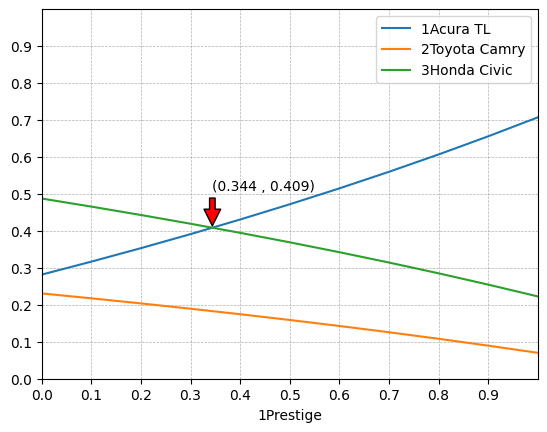

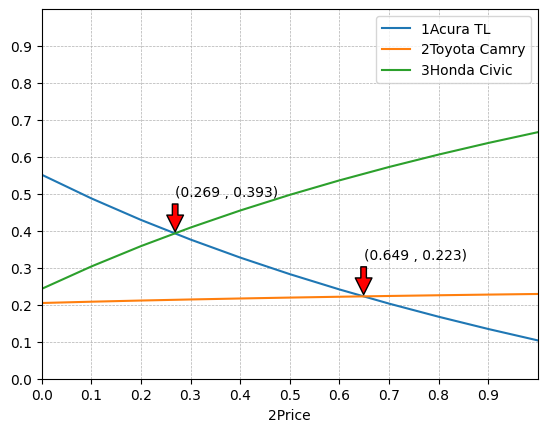

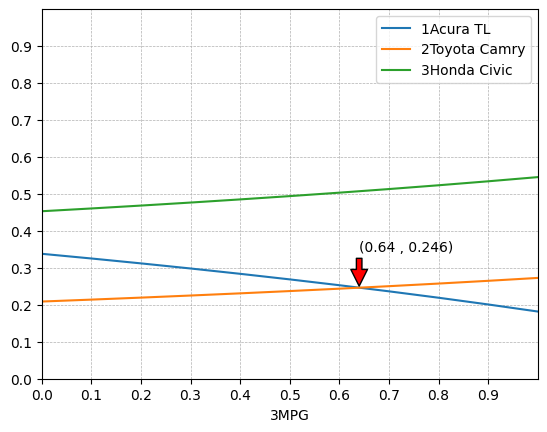

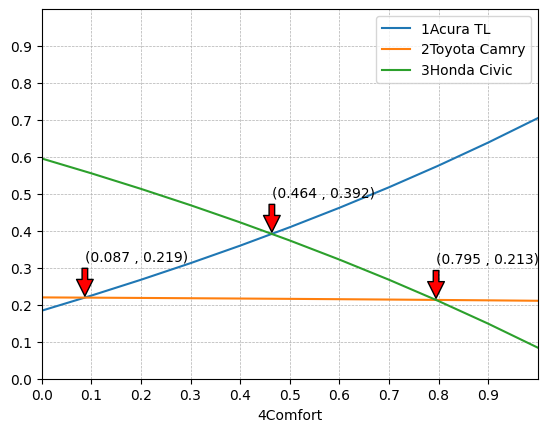

In [10]:
#sensitivity analysis: we analyze when priority of "1Prestige","2Price","3MPG","4Comfort" changes respectively, how the priorities of all nodes in 3Alternatives will change
#so we set the second parameter as 3Alternatives cluster and the last parameters as criteria node names
#the sensitivity analysis graphs will be exported to the outputFile. It can be the same file with AHP results and sensitivity analysis results will be appended as separate worksheets 

calc.sensitivityCellSupermatrixPlot(carModel,"3Alternatives",outputFile,False,"1Prestige","2Price","3MPG","4Comfort")

#### Export Qualrics questionnaires
Beside Excel questionnaire, we can also export txt files that are formated and can be imported in to Qualtrics questionnaire.

Similar as Excel questionnaires. There are three different questionnaires we can generate based on the completeness of the pairewise comparison questions: first line, first line and above and full questionnaires. The first line questionnaire will only has the questions for the first line in the pairwise comparison matrix, and first line above will has the first line and also all the questions needed to filled in the judgment above the diagnal in the paireise comparison matrix. And full questionnaire asks all the questions needed for the pairwise comparison matrix.

In [11]:
input.genexport4QualtricsFirstLineAboveDiagQuest("carModel_3Lvl_Qualtrics_FirstLineAbove.txt",carModel,"dominate")
input.genexport4QualtricsFirstLineQuest("carModel_3Lvl_Qualtrics_FirstLine.txt",carModel,"dominate")
input.genexport4QualtricsQuestFull("carModel_3Lvl_Qualtrics_Full.txt",carModel,"dominate")